# Demo of using NMF for Mouse Brain ISH data

In [2]:
import numpy as np
import sklearn
from nmf_with_missing_values import nmf_with_missing_values
# import ipyvolume
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt



## load the data

In [42]:
tmp = np.load('../../data/mouse_brain_ISH_float32.npz')
data = tmp['data']
sections = tmp['sections']
original_shape = data.shape
d = data.shape[1] * data.shape[2] * data.shape[3]
data = np.reshape(data, (data.shape[0], d))

## calculate nmf (could be quite long, do not run this chunk if you have the intermediate result

In [5]:
# n_components = 18 # top candidates: 14, 18
# nmf = nmf_with_missing_values(n_outer_loops = 2, n_components = n_components) 
# D = nmf.fit_transform(data)
# A = nmf.components_
# X_guess = nmf.X_guess
# np.savez('nmf_result_ncomp_'+str(n_components)+'.npz', D = D, A = A, X_guess = X_guess, data = data, original_shape = original_shape)

## load the intermediate result 

In [6]:
f = np.load('nmf_result_ncomp_18.npz')
A = f['A']
original_shape = f['original_shape']
X_guess = f['X_guess']
D = f['D']

## see the imputing effect

In [7]:
def make_cube(p1):
    ''' make X a cube
    '''
    max_dim = np.max(p1.shape)
    p2 = np.zeros((max_dim, max_dim, max_dim))
    for i in range(p1.shape[0]):
        for j in range(p1.shape[1]):
            for k in range(p1.shape[2]):
                p2[i,j,k] = max(p1[i,j,k],0)
    return p2

In [8]:
# factor_n = 1
# p1 = np.reshape(X_guess[factor_n,:] - np.maximum(data[factor_n,:],0), original_shape[1:])
# p1 = np.reshape(X_guess[factor_n,:] - np.maximum(data[factor_n,:],0), original_shape[1:])
# p2 = make_cube(p1)
# ipyvolume.figure()
# ipyvolume.volshow(p2, lighting=True)
# ipyvolume.show()
# # quickvolshow(p2)

## visualize the pattern

In [53]:
# for i in range(2):
#     p1 = np.reshape(A[i,:], original_shape[1:])
#     p1 = np.flip(p1,axis=1)
#     p1 = np.swapaxes(p1,0,2)
#     p2 = make_cube(p1)
#     ipyvolume.figure()
#     ipyvolume.volshow(p2, lighting=True)
#     ipyvolume.pylab.view(azimuth=180, elevation=None, distance=None)


#     ipyvolume.show()

/home/rezaa/miniconda/lib/python3.7/site-packages/ipyvolume/serialize.py:81: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


1707


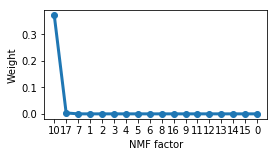

In [11]:
target_gene = 'Glra1'

gene_ids = np.zeros(len(sections.item()))
for gene_ind, gene_id in enumerate(sections.item()):    # for name, age in dictionary.iteritems():  (for Python 2.x)
    gene_ids[gene_ind] = gene_id

gene_id_target = 0 
for gene_id in sections.item():    # for name, age in dictionary.iteritems():  (for Python 2.x)
    if sections.item()[gene_id] == target_gene:
        gene_id_target = gene_id
        
gene_ind = np.where(gene_ids == gene_id_target)[0][0]
print(gene_ind)
top_factor = np.argsort(D[gene_ind,:])[::-1]

plt.figure(figsize=(4,2))
plt.plot(np.sort(D[gene_ind,:])[::-1],'o-',lw=3)
plt.xticks(range(D.shape[1]),top_factor)
plt.xlabel('NMF factor')
plt.ylabel('Weight')
plt.show()

# for i in top_factor[:2]:
#     p1 = np.reshape(A[i,:], original_shape[1:])
#     p1 = np.flip(p1,axis=1)
#     p1 = np.swapaxes(p1,0,2)
#     p2 = make_cube(p1)
#     ipyvolume.figure()
#     ipyvolume.volshow(p2, lighting=True)
# #     ipyvolume.pylab.view(azimuth=450, elevation=None, distance=None)
#     ipyvolume.show()

In [122]:
top_factor

array([ 5,  3, 17, 15, 19, 14, 16,  4,  2, 21,  7,  1,  6, 10,  8,  9, 20,
       11, 12, 13, 18,  0])

In [123]:
top_factor[:2]

array([5, 3])

In [110]:
np.where(gene_ids == gene_id)[0][0]

4344

# 2D plots

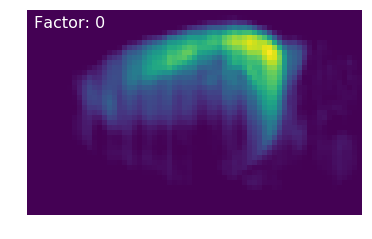

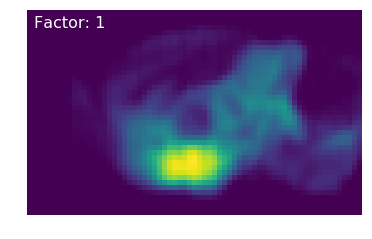

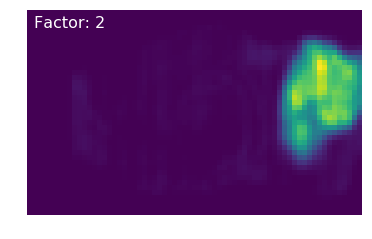

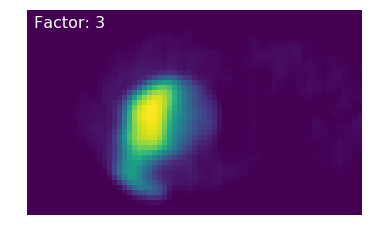

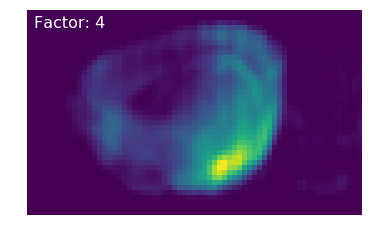

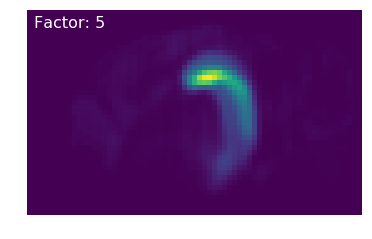

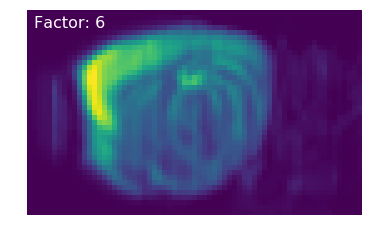

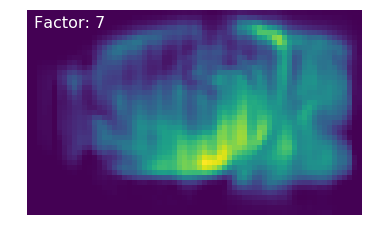

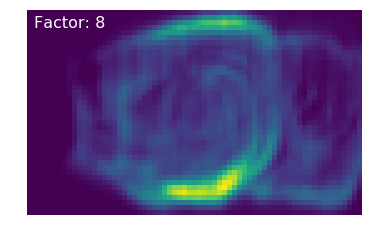

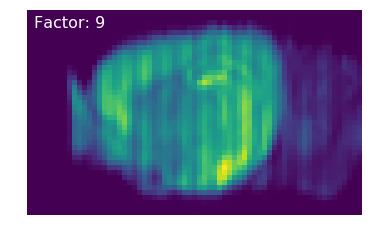

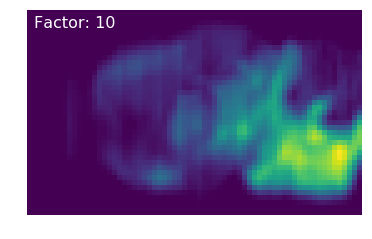

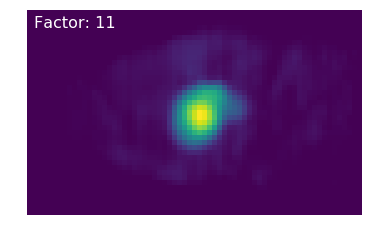

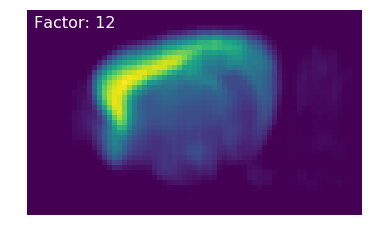

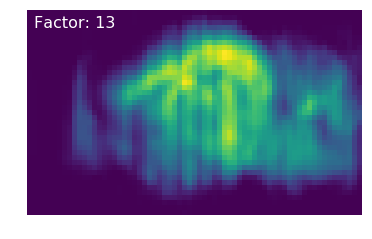

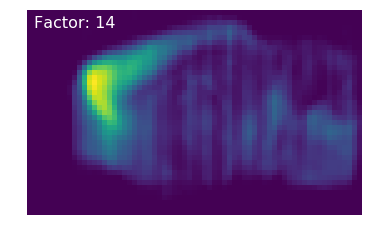

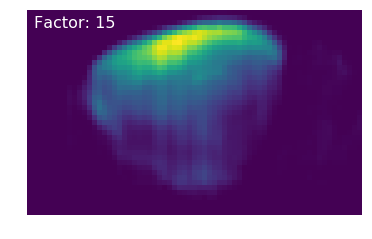

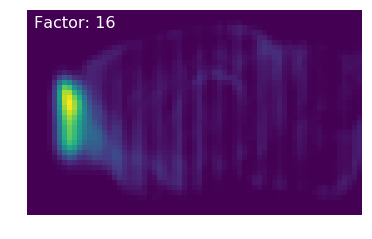

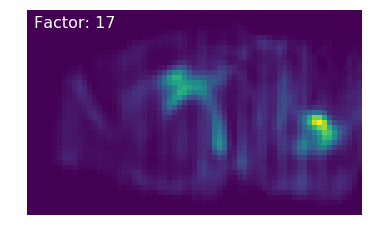

In [12]:
factors = np.zeros((18, 67, 41, 58))

for i in range(A.shape[0]):
    p2 = np.reshape(A[i,:], original_shape[1:])
    plt.imshow(np.mean(p2,axis=2).T)
    plt.axis('off')
    plt.text(1,3,'Factor: '+str(i),fontsize=16, color='w')
    plt.show()
    factors[i,:,:,:] = p2

1937


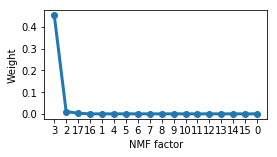

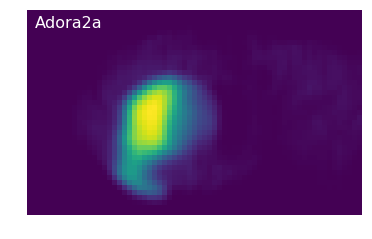

1799


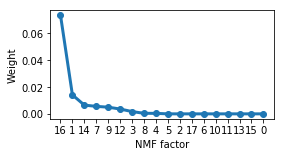

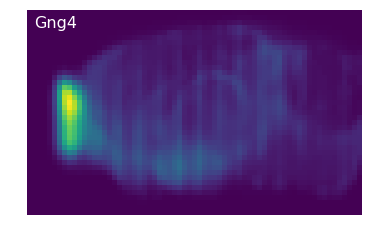

3276


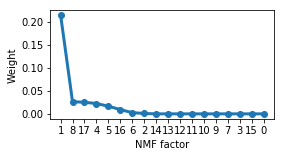

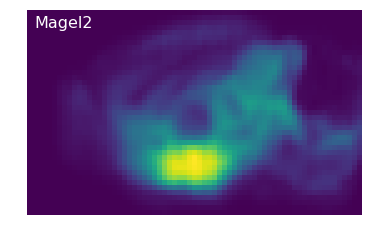

3782


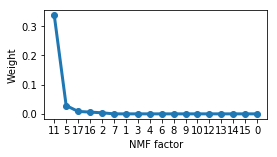

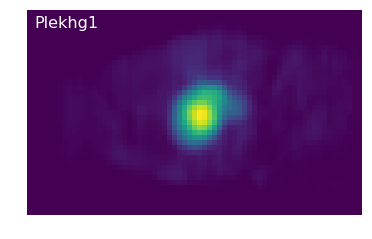

1707


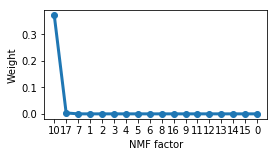

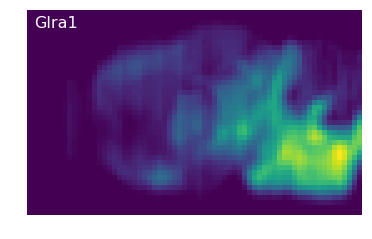

1533


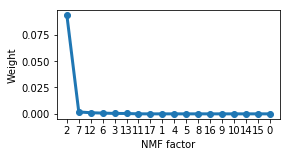

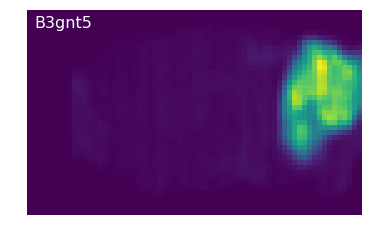

3104


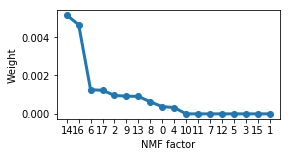

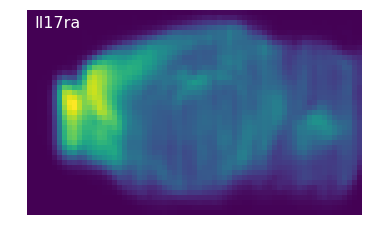

388


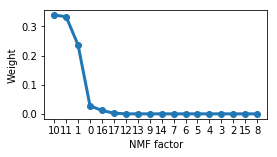

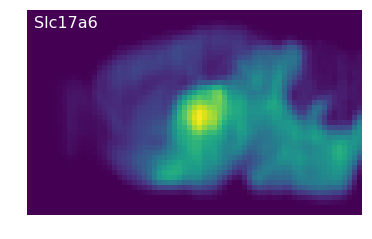

426


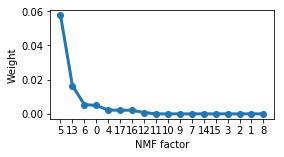

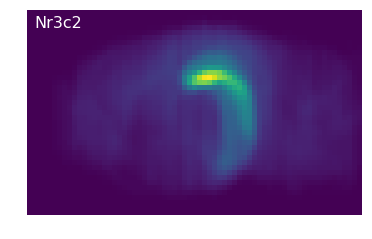

3275


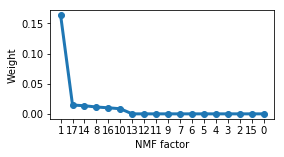

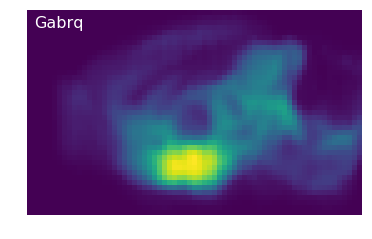

In [13]:
target_genes = ['Adora2a','Gng4','Magel2','Plekhg1','Glra1','B3gnt5','Il17ra','Slc17a6','Nr3c2','Gabrq']

for target_gene in target_genes:
    gene_ids = np.zeros(len(sections.item()))
    for gene_ind, gene_id in enumerate(sections.item()):    # for name, age in dictionary.iteritems():  (for Python 2.x)
        gene_ids[gene_ind] = gene_id

    gene_id_target = 0 
    for gene_id in sections.item():    # for name, age in dictionary.iteritems():  (for Python 2.x)
        if sections.item()[gene_id] == target_gene:
            gene_id_target = gene_id

    gene_ind = np.where(gene_ids == gene_id_target)[0][0]
    print(gene_ind)
    top_factor = np.argsort(D[gene_ind,:])[::-1]

    plt.figure(figsize=(4,2))
    plt.plot(np.sort(D[gene_ind,:])[::-1],'o-',lw=3)
    plt.xticks(range(D.shape[1]),top_factor)
    plt.xlabel('NMF factor')
    plt.ylabel('Weight')
    plt.show()

    p2 = np.reshape(np.matmul(D[gene_ind,:],A), original_shape[1:])   
    plt.imshow(np.mean(p2,axis=2).T)
    plt.axis('off')
    plt.text(1,3,target_gene,fontsize=16, color='w')
    plt.show()


In [14]:
import pandas as pd
areas_atlas = np.load('mouse_coarse_structure_atlas.npy')
mouse_coarse_df = pd.read_pickle('mouse_coarse_df')

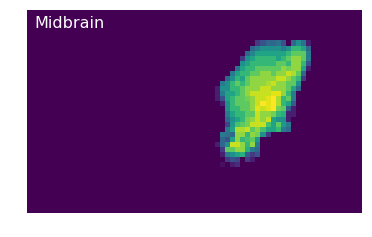

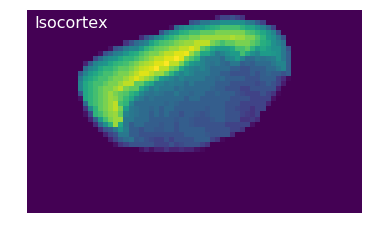

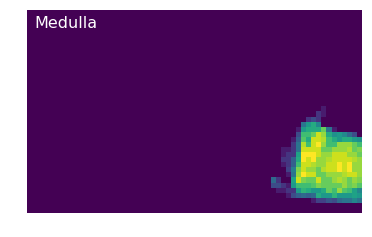

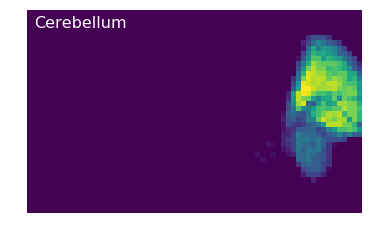

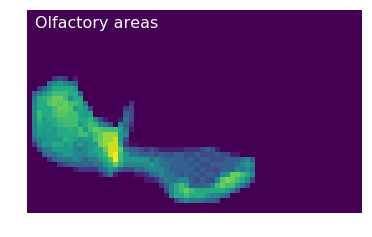

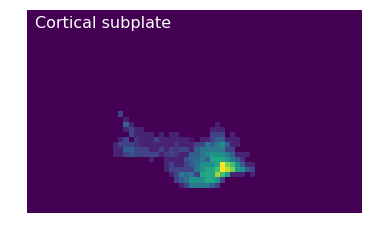

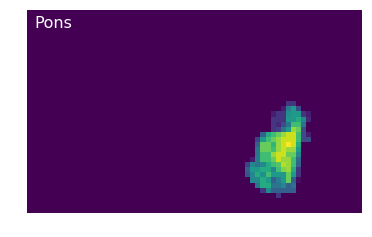

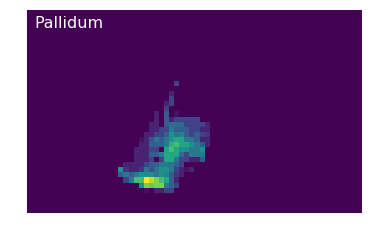

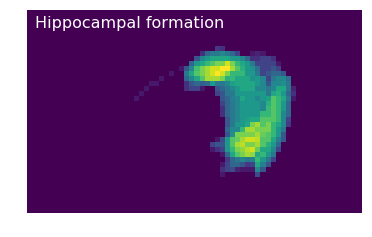

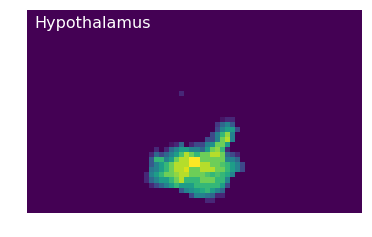

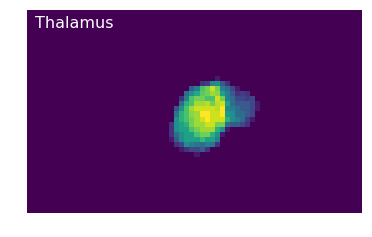

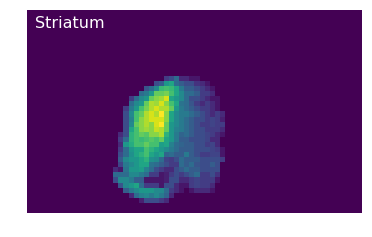

In [15]:
for i in range(12):
    plt.imshow(np.mean(areas_atlas[i,:,:,:],axis=2).T)
    plt.axis('off')
    plt.text(1,3,(mouse_coarse_df.iloc[i]['name']),fontsize=16, color='w')
    plt.show()

In [7]:
cor_mat = np.zeros((12,18))
for i in range(12):
    for j in range(18):
        cor_mat[i,j] = np.corrcoef(areas_atlas.reshape(12,-1)[i,:],factors[:,:-1,:-1,:-1].reshape(18,-1)[j,:])[0,1]

Text(0.5, 0, 'staNMF Factor')

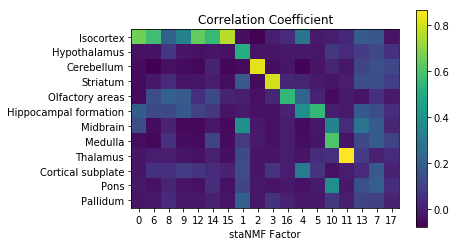

In [13]:
# area_order=[ 1,  9,  3, 11,  8, 6, 2, 10, 0, 4, 5,7]
factor_order = [0,6,8,9,12,14,15,1,2,3,16,4,5,10,11,13,7,17]

area_order=[1,9,3,11,4,8,0,2,10,5,6,7]
# factor_order = [0,6,8,9,12,1,2,3,4,5,7,10,11,13]

plt.imshow(cor_mat[area_order,:][:,factor_order])
plt.yticks(range(12),(mouse_coarse_df.iloc[area_order]['name'].tolist()))
plt.xticks(range(18),factor_order)
plt.colorbar()
plt.title('Correlation Coefficient')
plt.xlabel('staNMF Factor')

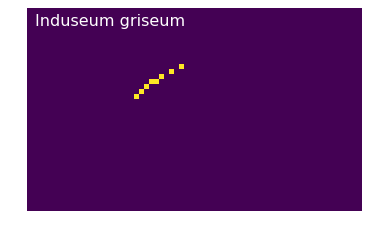

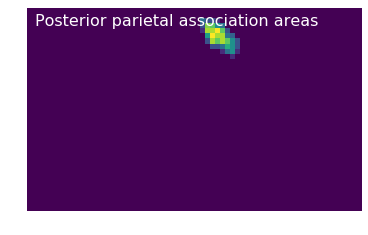

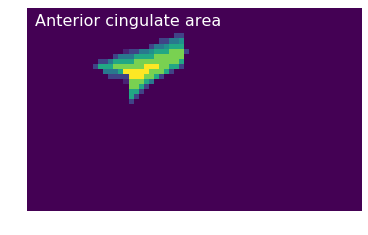

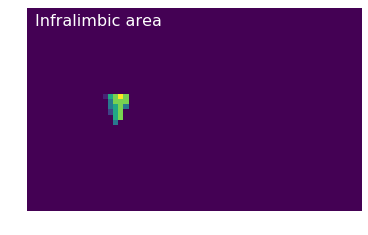

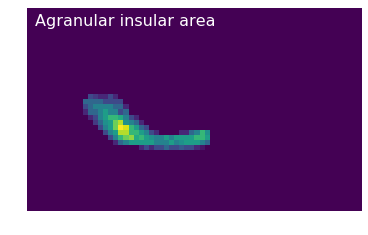

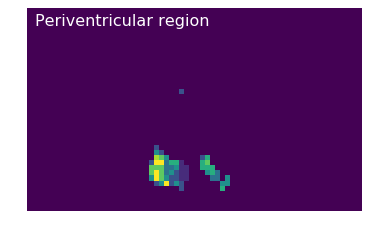

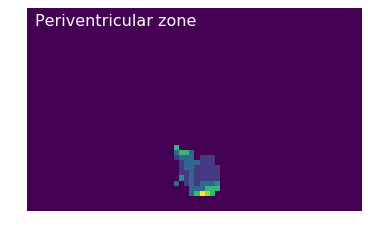

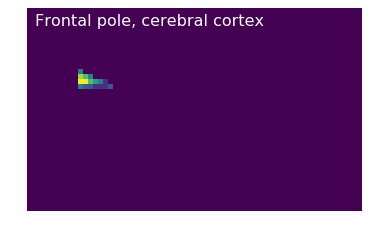

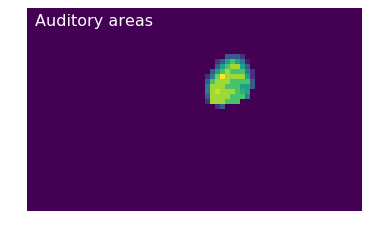

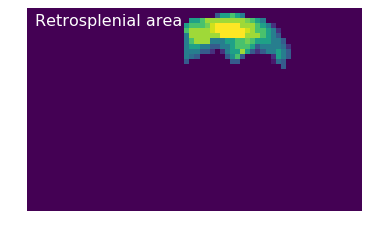

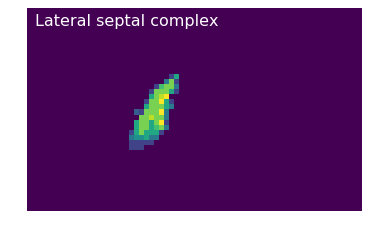

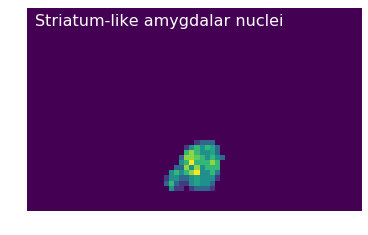

In [14]:
areas_atlas = np.load('mouse_areas_structure_atlas.npy')
mouse_coarse_df = pd.read_pickle('mouse_areas_df')

for i in range(12):
    plt.imshow(np.mean(areas_atlas[i,:,:,:],axis=2).T)
    plt.axis('off')
    plt.text(1,3,(mouse_coarse_df.iloc[i]['name']),fontsize=16, color='w')
    plt.show()

In [15]:
cor_mat = np.zeros((51,18))
for i in range(51):
    for j in range(18):
        cor_mat[i,j] = np.corrcoef(areas_atlas.reshape(51,-1)[i,:],factors[:,:-1,:-1,:-1].reshape(18,-1)[j,:])[0,1]

/home/rezaa/miniconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/rezaa/miniconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Text(0.5, 0, 'staNMF Factor')

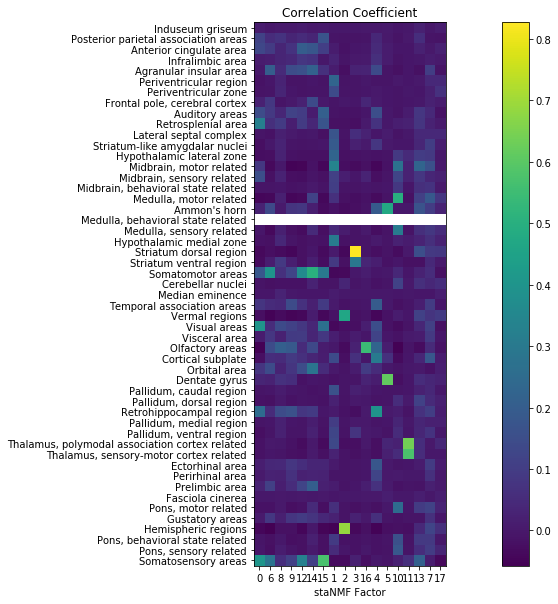

In [17]:
factor_order = [0,6,8,9,12,14,15,1,2,3,16,4,5,10,11,13,7,17]

plt.figure(figsize=(20,10))
plt.imshow(cor_mat[:,factor_order])
plt.yticks(range(51),(mouse_coarse_df['name'].tolist()))
plt.xticks(range(18),factor_order)
plt.colorbar()
plt.title('Correlation Coefficient')
plt.xlabel('staNMF Factor')

# K = 14

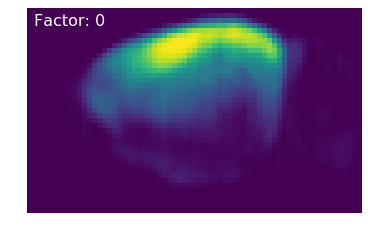

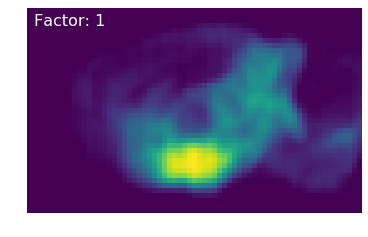

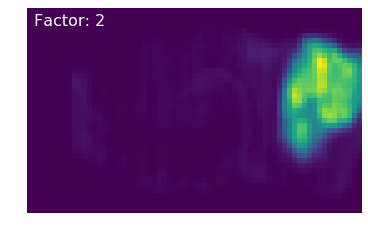

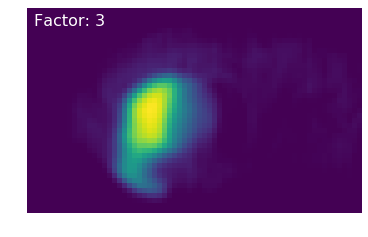

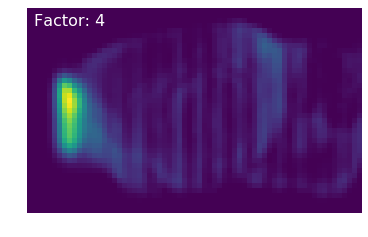

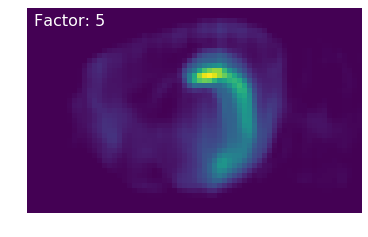

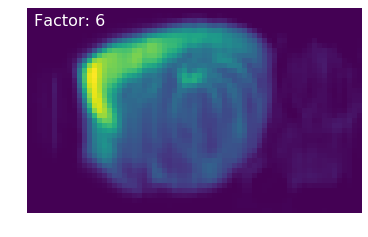

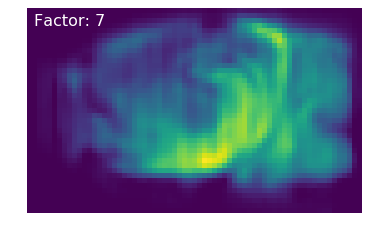

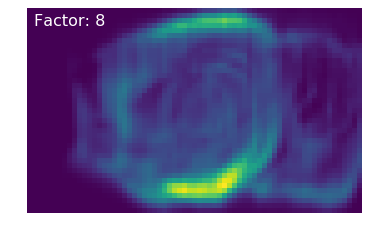

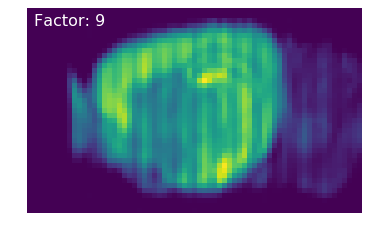

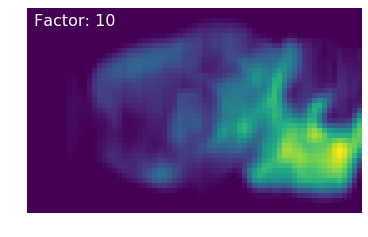

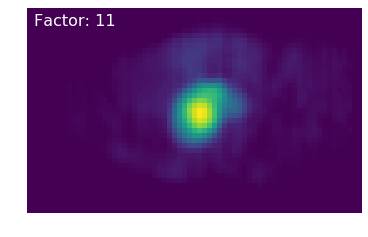

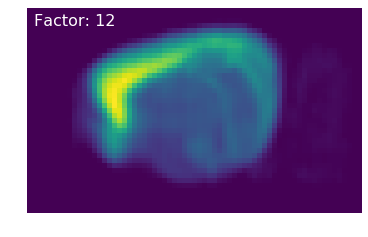

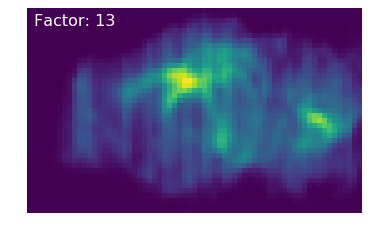

In [8]:
factors = np.zeros((14, 67, 41, 58))

for i in range(A.shape[0]):
    p2 = np.reshape(A[i,:], original_shape[1:])
    plt.imshow(np.mean(p2,axis=2).T)
    plt.axis('off')
    plt.text(1,3,'Factor: '+str(i),fontsize=16, color='w')
    plt.show()
    factors[i,:,:,:] = p2

1937


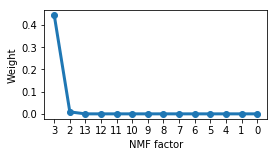

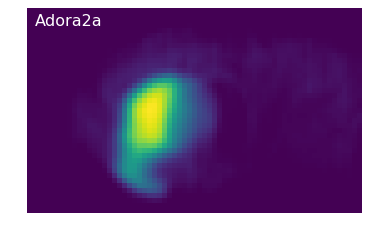

1799


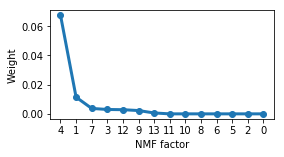

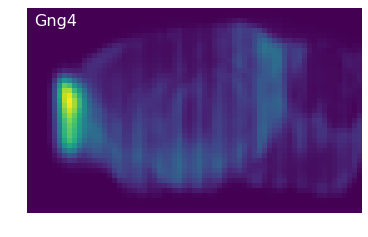

3276


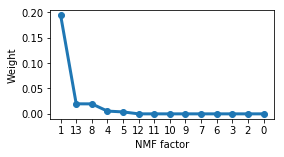

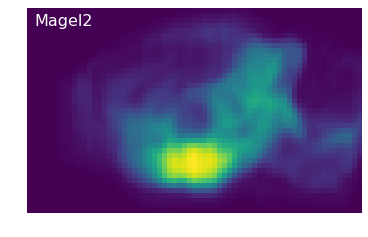

3782


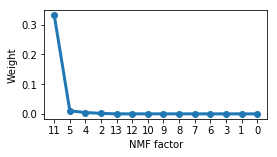

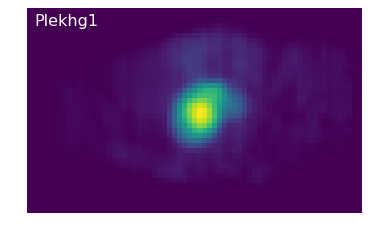

1707


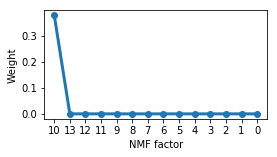

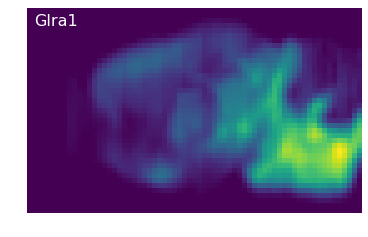

1533


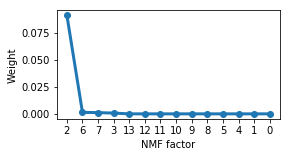

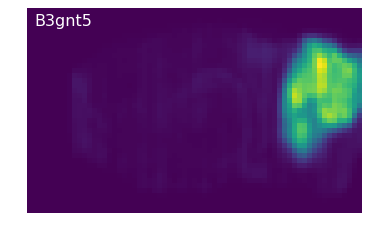

3104


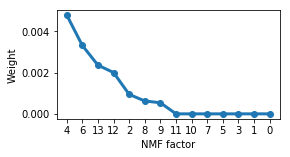

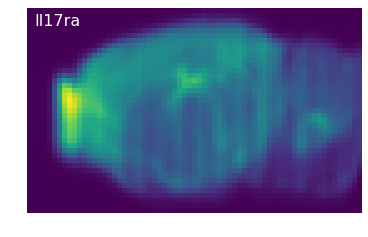

388


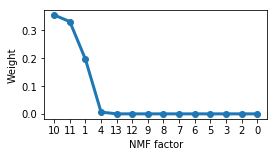

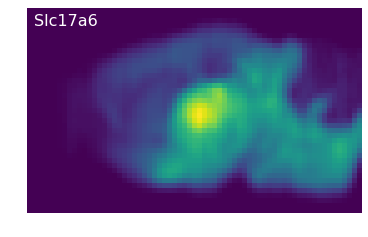

426


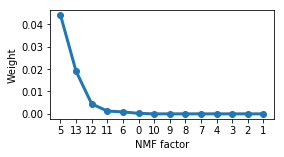

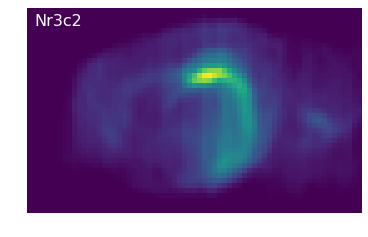

3275


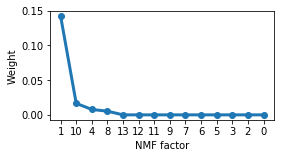

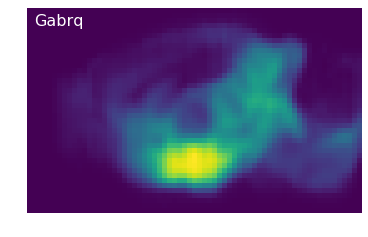

In [22]:
target_genes = ['Adora2a','Gng4','Magel2','Plekhg1','Glra1','B3gnt5','Il17ra','Slc17a6','Nr3c2','Gabrq']

for target_gene in target_genes:
    gene_ids = np.zeros(len(sections.item()))
    for gene_ind, gene_id in enumerate(sections.item()):    # for name, age in dictionary.iteritems():  (for Python 2.x)
        gene_ids[gene_ind] = gene_id

    gene_id_target = 0 
    for gene_id in sections.item():    # for name, age in dictionary.iteritems():  (for Python 2.x)
        if sections.item()[gene_id] == target_gene:
            gene_id_target = gene_id

    gene_ind = np.where(gene_ids == gene_id_target)[0][0]
    print(gene_ind)
    top_factor = np.argsort(D[gene_ind,:])[::-1]

    plt.figure(figsize=(4,2))
    plt.plot(np.sort(D[gene_ind,:])[::-1],'o-',lw=3)
    plt.xticks(range(D.shape[1]),top_factor)
    plt.xlabel('NMF factor')
    plt.ylabel('Weight')
    plt.show()

    p2 = np.reshape(np.matmul(D[gene_ind,:],A), original_shape[1:])   
    plt.imshow(np.mean(p2,axis=2).T)
    plt.axis('off')
    plt.text(1,3,target_gene,fontsize=16, color='w')
    plt.show()



In [10]:
import pandas as pd
areas_atlas = np.load('mouse_coarse_structure_atlas.npy')
mouse_coarse_df = pd.read_pickle('mouse_coarse_df')

cor_mat = np.zeros((12,14))
for i in range(12):
    for j in range(14):
        cor_mat[i,j] = np.corrcoef(areas_atlas.reshape(12,-1)[i,:],factors[:,:-1,:-1,:-1].reshape(14,-1)[j,:])[0,1]

Text(0.5, 0, 'staNMF Factor')

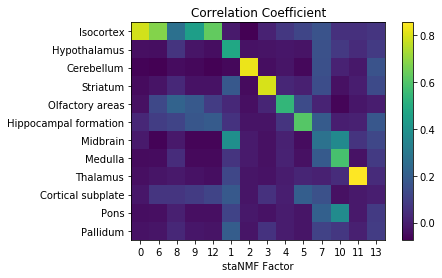

In [17]:
area_order=[1,9,3,11,4,8,0,2,10,5,6,7]
factor_order = [0,6,8,9,12,1,2,3,4,5,7,10,11,13]
plt.imshow(cor_mat[area_order,:][:,factor_order])
plt.yticks(range(12),(mouse_coarse_df.iloc[area_order]['name'].tolist()))
plt.xticks(range(14),factor_order)
plt.colorbar()
plt.title('Correlation Coefficient')
plt.xlabel('staNMF Factor')

/home/rezaa/miniconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/rezaa/miniconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Text(0.5, 0, 'staNMF Factor')

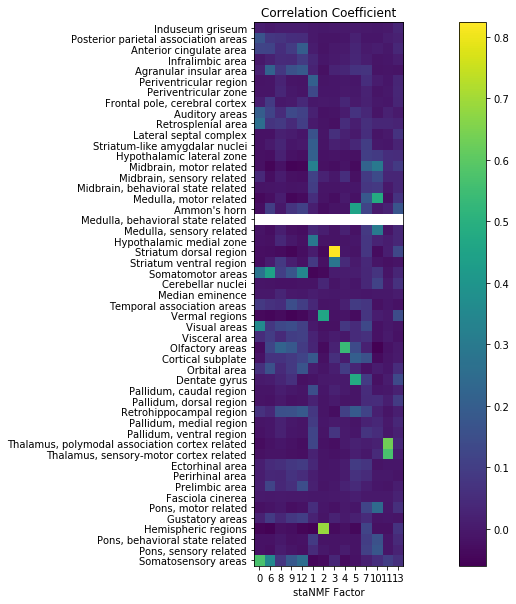

In [21]:
import pandas as pd
areas_atlas = np.load('mouse_areas_structure_atlas.npy')
mouse_coarse_df = pd.read_pickle('mouse_areas_df')

cor_mat = np.zeros((51,14))
for i in range(51):
    for j in range(14):
        cor_mat[i,j] = np.corrcoef(areas_atlas.reshape(51,-1)[i,:],factors[:,:-1,:-1,:-1].reshape(14,-1)[j,:])[0,1]

# area_order=[ 1,  9,  3, 11,  8, 6, 2, 10, 0, 4, 5,7]
factor_order = [0,6,8,9,12,1,2,3,4,5,7,10,11,13]

plt.figure(figsize=(20,10))
plt.imshow(cor_mat[:,factor_order])
plt.yticks(range(51),(mouse_coarse_df['name'].tolist()))
plt.xticks(range(14),factor_order)
plt.colorbar()
plt.title('Correlation Coefficient')
plt.xlabel('staNMF Factor')

# LASSO analysis

In [16]:
data_correctec = data.copy()
data_correctec[np.where(data_correctec==-1)]=0

(18, 159326)

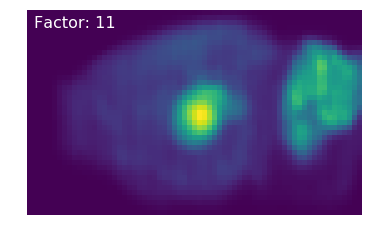

In [23]:
factors = np.zeros((18, 67, 41, 58))

# for i in range(A.shape[0]):
p2 = np.reshape(np.matmul(D[0,:],A), original_shape[1:])
plt.imshow(np.mean(p2,axis=2).T)
plt.axis('off')
plt.text(1,3,'Factor: '+str(i),fontsize=16, color='w')
plt.show()

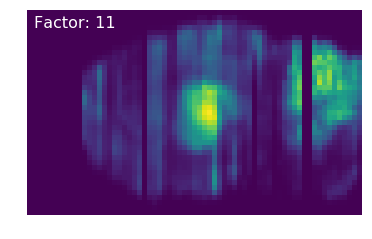

In [48]:
p2 = np.reshape(data_correctec[0,:], original_shape[1:])
plt.imshow(np.mean(p2,axis=2).T)
plt.axis('off')
plt.text(1,3,'Factor: '+str(i),fontsize=16, color='w')
plt.show()

In [127]:
from sklearn.linear_model import LassoCV
from scipy import optimize

In [ ]:
corr_lasso = np.zeros(D.shape[0])
corr_nnls = np.zeros(D.shape[0])
coeffs_lasso = np.zeros((D.shape[0],D.shape[1]))
model_size_nmf = np.zeros(D.shape[0])
model_size_lasso = np.zeros(D.shape[0])



In [177]:
for gene_ind in range(476,D.shape[0]):
    X = A[np.where(D[gene_ind,:]!=0)[0],:].T
    y = data_correctec[gene_ind,:]
    reg = LassoCV(cv=10, random_state=0).fit(X, y)
    if np.sum(reg.coef_)==0:
        print('error, gene_ind:',gene_ind)
        continue
    else:
        corr_lasso[gene_ind] = np.corrcoef(reg.predict(X),y)[0,1]
        coeffs = np.zeros(D.shape[1])
        coeffs[np.where(D[gene_ind,:]!=0)[0]]=reg.coef_
        coeffs_lasso[gene_ind,:] = coeffs
        model_size_lasso[gene_ind] = np.sum(coeffs!=0)
        model_size_nmf[gene_ind] = np.sum(D[gene_ind,:]!=0)

        Xn = A[np.where(coeffs!=0)[0],:].T
        w_nnls = optimize.nnls(Xn,y)
        corr_nnls[gene_ind] = np.corrcoef(np.matmul(Xn,w_nnls[0]),y)[0,1]

error, gene_ind: 477
error, gene_ind: 619
error, gene_ind: 1170


In [178]:
np.savez('lasso_results_18.npz', corr_lasso = corr_lasso, corr_nnls = corr_nnls, model_size_nmf = model_size_nmf, model_size_lasso = model_size_lasso, coeffs_lasso = coeffs_lasso)

In [184]:
print(np.median(corr_lasso))
print(np.median(corr_nnls))
print(np.median(model_size_nmf))
print(np.median(model_size_lasso))

0.7894987894532982
0.7896308953788076
12.0
13.0
